In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

In [4]:
df = pd.read_csv('Traning .csv')

In [5]:
df.head()

,Age,Gender,Che0Pai0T1pe,Re0i0gBP,Chole0erol,0a0i0gBS,Re0i0gECG,1axHR,ExerciseA0gi0a,Oldpeak,0_Slope,Label
0,49,0,1,160,180,0,1,156,0,1.0,1,1
1,48,0,2,138,214,0,1,108,1,1.5,1,1
2,37,1,2,140,207,0,1,130,1,1.5,1,1
3,58,1,0,136,164,0,0,99,1,2.0,1,1
4,49,1,2,140,234,0,1,140,1,1.0,1,1


In [6]:
df.shape

(640, 12)

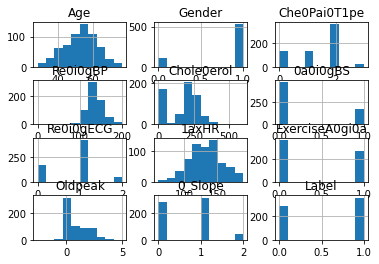

<Figure size 1440x1440 with 0 Axes>

<Figure size 1440x1440 with 0 Axes>

In [7]:
df.hist()
plt.show()
plt.figure(figsize=(20,20))

In [11]:
X = df.iloc[:,0:-1]
y = df.iloc[:,-1]

In [12]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

# knn 

In [13]:
knn_scores = []
for k in range(1,21):
    knn_classifier = KNeighborsClassifier(n_neighbors = k)
    knn_classifier.fit(X_train, y_train)
    knn_scores.append(knn_classifier.score(X_test, y_test))

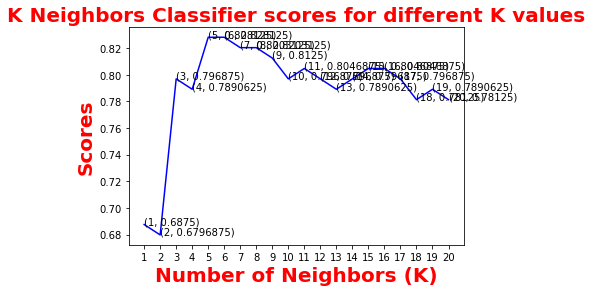

In [15]:
plt.plot([k for k in range(1,21)],knn_scores,color='blue')
for i in range(1,21):
    plt.text(i, knn_scores[i-1], (i, knn_scores[i-1]))
plt.xticks([i for i in range(1, 21)])
plt.xlabel('Number of Neighbors (K)',color='Red',weight='bold',fontsize='20')
plt.ylabel('Scores',color='Red',weight='bold',fontsize='20')
plt.title('K Neighbors Classifier scores for different K values',color='Red',weight='bold',fontsize='20')
plt.show()
plt.rcParams["font.weight"]= "bold"
plt.rcParams["axes.labelweight"] = "bold"

In [17]:
from sklearn.model_selection import cross_val_score
knn_classifier = KNeighborsClassifier(n_neighbors = 12)
score=cross_val_score(knn_classifier,X,y,cv=10)

In [18]:
score.mean()

0.7203125

# SVM

In [20]:
svc = SVC()

In [21]:
svc.fit(X_train,y_train)
y_pred = svc.predict(X_test)
accuracy_score(y_test,y_pred)

0.7890625

In [22]:
from sklearn.metrics import confusion_matrix,classification_report

In [23]:
cf_matrix = confusion_matrix(y_test, y_pred)

print(cf_matrix)

[[44 17]
 [10 57]]


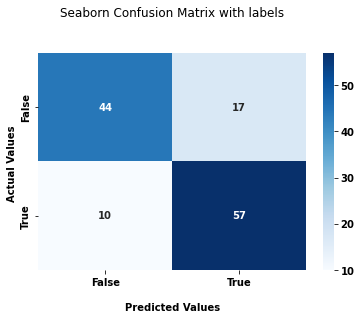

In [24]:
import seaborn as sns

ax = sns.heatmap(cf_matrix, annot=True, cmap='Blues')

ax.set_title('Seaborn Confusion Matrix with labels\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])

## Display the visualization of the Confusion Matrix.
plt.show()

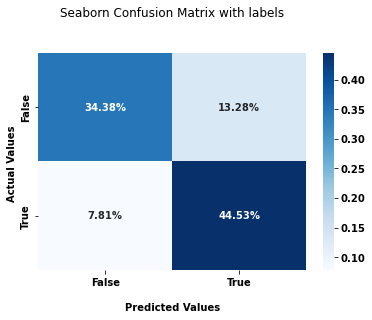

In [25]:
ax = sns.heatmap(cf_matrix/np.sum(cf_matrix), annot=True, 
            fmt='.2%', cmap='Blues')

ax.set_title('Seaborn Confusion Matrix with labels\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])

## Display the visualization of the Confusion Matrix.
plt.show()

In [26]:
classification=classification_report(y_test, y_pred)
print("Classification Report \n",classification)

Classification Report 
               precision    recall  f1-score   support

           0       0.81      0.72      0.77        61
           1       0.77      0.85      0.81        67

    accuracy                           0.79       128
   macro avg       0.79      0.79      0.79       128
weighted avg       0.79      0.79      0.79       128

